MNIST Classification using Deep learning

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

# Helper function to display images in Jupyter (replacement for cv2_imshow)
def cv2_imshow(image):
	plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if len(image.shape) == 3 else image, cmap='gray')
	plt.axis('off')
	plt.show()

Loading MNIST data from Keras.datasets

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
print(x_train[22])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31 144 250
  254 166   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  98 241 204  97
  126 253  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6 121 247 13

In [8]:
print(y_train[22])

9


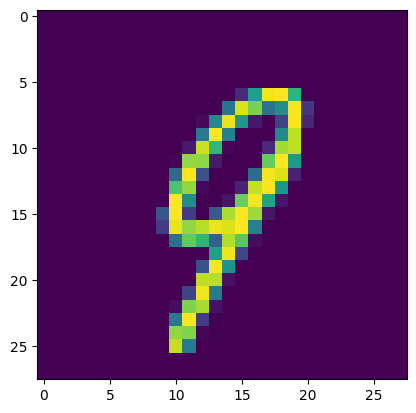

In [9]:
plt.imshow(x_train[22])
plt.show()



In [10]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
x_train = x_train/255
x_test = x_test/255
print(x_train[22])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

c:\Users\pdhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [14]:
# training
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9133 - loss: 0.3005
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9578 - loss: 0.1420
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9685 - loss: 0.1045
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9749 - loss: 0.0832
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0674
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9827 - loss: 0.0562
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0480
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0422
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9879 - loss: 0.0356
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9883 - loss: 0.0320


In [15]:
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1223
0.9628999829292297


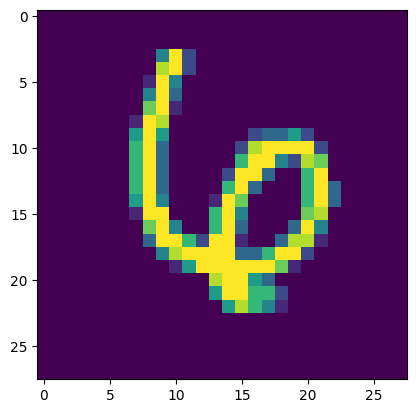

In [16]:
plt.imshow(x_test[22])
plt.show()

In [17]:
print(x_test.shape)
print(y_test.shape)
print(y_test[22])

(10000, 28, 28)
(10000,)
6


In [18]:
y_pred = model.predict(x_test)
print(y_pred.shape)
print(y_pred[22])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
(10000, 10)
[1.3116097e-02 1.3695128e-01 3.8158351e-03 8.2231034e-03 1.4895550e-02
 2.4384244e-03 9.9999619e-01 2.7829637e-03 2.4546954e-01 2.1242644e-07]


In [19]:
# converting prediction into probabilities class label
label_for_first_test_image = np.argmax(y_pred[22])
print(label_for_first_test_image)

6


In [20]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [21]:
conf_mat = confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

[[ 944    0    0    5    2    1    0    1    1   26]
 [   0 1117    2    4    0    1    2    2    5    2]
 [   4    2  992   13    2    0    5    8    4    2]
 [   0    0    3  985    0   10    2    3    3    4]
 [   0    0    2    0  965    0    4    3    0    8]
 [   1    0    0   52    2  827    3    0    3    4]
 [   3    2    1    2    3    9  938    0    0    0]
 [   1    0    7    6    6    0    0  996    0   12]
 [   1    0    2   20    4   12    2    5  908   20]
 [   1    1    0    4   21    5    0    7    3  967]]


Text(0.5, 47.7222222222222, 'Predicted Labels')

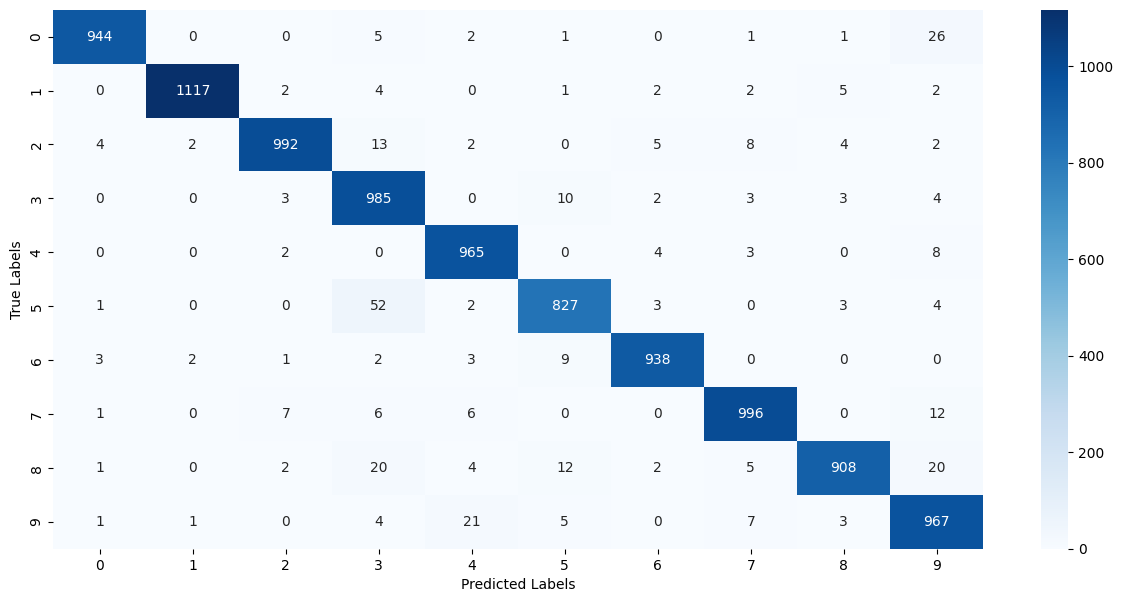

In [22]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat,annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Practing if single digit works or not


In [27]:
input_image_path = 'D:/Projects/mnist.png'  # Update this path to where your image is located
input_image = cv2.imread(input_image_path)
type(input_image)
if input_image is not None:
	cv2_imshow(input_image)
	print(input_image.shape)
	grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
	print(grayscale.shape)
else:
	print(f"Error: Could not load image from {input_image_path}")
	print("Please check if the file exists at the specified path")

Error: Could not load image from D:/Projects/mnist.png
Please check if the file exists at the specified path


In [28]:
# resize the new image
if input_image is not None:
	grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
	input_image_resize = cv2.resize(grayscale, (28,28))
	print(input_image_resize.shape)
	cv2_imshow(input_image_resize)
else:
	print(f"Error: Cannot process image. Please ensure the image is loaded correctly in the previous cell.")

Error: Cannot process image. Please ensure the image is loaded correctly in the previous cell.


In [33]:
input_image_resize = input_image_resize/255
type(input_image_resize)
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
print(input_prediction)

NameError: name 'input_image_resize' is not defined

In [ ]:
input_pred_lebal = np.argmax(input_prediction)
print(input_pred_lebal)

Error: Cannot display prediction label. Please ensure the image is loaded correctly in cell 22.
